<a href="https://colab.research.google.com/github/arizky012/BioInformatics-Class/blob/master/Final_Proyek_BioInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn import preprocessing
from numpy import where

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_Cortex_Nuclear.csv to Data_Cortex_Nuclear.csv


In [113]:
data = pd.read_csv('Data_Cortex_Nuclear.csv')
data.head(5)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [115]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [0]:
data = data.dropna()

In [121]:
data = data.reset_index()
data

,index,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,0.969466,0.321260,0.406562,0.255293,1.056343,1.099300,1.925284,2.231671,0.426859,0.873228,0.512773,0.343220,0.167629,1.852756,3.366492,1.503675,0.246019,0.305424,0.851006,0.165179,0.441557,2.578215,0.340857,0.487664,0.401050,0.781365,0.534033,0.431846,...,0.427297,0.252056,0.242086,1.061181,0.163758,1.862368,0.321175,0.541041,2.159547,0.134639,0.158178,0.196124,0.132001,0.161120,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.687551,2.436587,0.168172,1.139154,0.987774,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
1,76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,0.991845,0.342918,0.396910,0.270815,1.032790,1.078712,1.893047,2.330987,0.409185,0.789013,0.511502,0.344807,0.166695,1.852532,3.431159,1.471674,0.242060,0.300172,0.833648,0.162661,0.437253,2.538026,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,...,0.425837,0.252017,0.242120,1.063985,0.169981,1.692204,0.320473,0.539226,2.167098,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.662872,2.354728,0.174704,1.227851,0.981655,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
2,77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,0.989999,0.328976,0.397930,0.263795,1.092289,1.094043,1.915958,1.952540,0.454075,0.793754,0.533205,0.352048,0.172559,1.965786,3.434249,1.541802,0.251952,0.345908,0.881393,0.165278,0.443460,2.609615,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,...,0.445214,0.252303,0.241042,1.059453,0.175230,1.654840,0.317856,0.561875,2.182447,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.204300,0.129555,0.270062,0.153629,0.506309,0.349753,1.716362,2.437317,0.156001,1.226103,0.994146,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
3,78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.755842,2.297212,0.484818,0.742183,0.459194,0.337510,0.161982,1.364714,2.814990,1.440795,0.234902,0.274975,0.766452,0.150581,0.407608,2.311999,0.312112,0.466305,0.394740,0.740603,0.522971,0.391918,...,0.399932,0.277458,0.208718,0.969007,0.153779,2.027937,0.299825,0.466762,1.795148,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.316600,1.586368,2.382140,0.145049,1.056498,0.970067,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
4,79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,0.815057,0.315001,0.391525,0.254142,0.955370,0.938465,1.744844,2.477854,0.476502,0.715880,0.486307,0.338668,0.160600,1.398174,2.891018,1.469402,0.234870,0.270033,0.755438,0.149555,0.411360,2.320861,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,...,0.405838,0.354671,0.212714,0.972906,0.163062,1.969799,0.303008,0.491797,1.763485,0.124348,0.153741,0.188106,0.128635,0.167972,0.196992,0.197117,0.128635,0.283371,0.137211,0.542568,0

In [122]:
data.isnull().sum()

index        0
MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 83, dtype: int64

In [123]:
data.dtypes

index          int64
MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 83, dtype: object

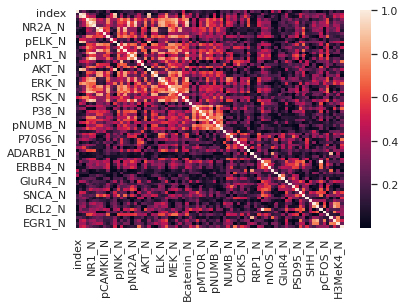

In [124]:
datacorr = data.corr().abs()
sns.heatmap(datacorr)

# fill missing data

In [0]:
data = data.interpolate(method='akima')
data.fillna(method='bfill', inplace=True)

In [9]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.178604,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.178604,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.178604,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.178604,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.

# filtering protein feature

convert categorial to number

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_class = data.iloc[:,81].values
X_gen = data.iloc[:,78].values
X_treat = data.iloc[:,79].values
X_beh = data.iloc[:,80].values
X_class = labelencoder.fit_transform(X_class)
X_gen = labelencoder.fit_transform(X_gen)
X_treat = labelencoder.fit_transform(X_treat)
X_beh = labelencoder.fit_transform(X_beh)

Creating the input features X and target variable y

In [0]:
X = data.iloc[:,2:79]
X['Genotype'] = X_gen
X['Treatment'] = X_treat
X['Behavior'] = X_beh
Y = X_class

In [158]:
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,0.969466,0.321260,0.406562,0.255293,1.056343,1.099300,1.925284,2.231671,0.426859,0.873228,0.512773,0.343220,0.167629,1.852756,3.366492,1.503675,0.246019,0.305424,0.851006,0.165179,0.441557,2.578215,0.340857,0.487664,0.401050,0.781365,0.534033,0.431846,0.618023,0.361417,0.321960,0.427297,0.252056,0.242086,1.061181,0.163758,1.862368,0.321175,0.541041,2.159547,0.134639,0.158178,0.196124,0.132001,0.161120,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.687551,2.436587,0.168172,1.139154,0.987774,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,412,0,0
1,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,0.991845,0.342918,0.396910,0.270815,1.032790,1.078712,1.893047,2.330987,0.409185,0.789013,0.511502,0.344807,0.166695,1.852532,3.431159,1.471674,0.242060,0.300172,0.833648,0.162661,0.437253,2.538026,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,0.603176,0.360258,0.296052,0.425837,0.252017,0.242120,1.063985,0.169981,1.692204,0.320473,0.539226,2.167098,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.662872,2.354728,0.174704,1.227851,0.981655,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,380,0,0
2,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,0.989999,0.328976,0.397930,0.263795,1.092289,1.094043,1.915958,1.952540,0.454075,0.793754,0.533205,0.352048,0.172559,1.965786,3.434249,1.541802,0.251952,0.345908,0.881393,0.165278,0.443460,2.609615,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,0.640232,0.374331,0.299675,0.445214,0.252303,0.241042,1.059453,0.175230,1.654840,0.317856,0.561875,2.182447,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.204300,0.129555,0.270062,0.153629,0.506309,0.349753,1.716362,2.437317,0.156001,1.226103,0.994146,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,386,0,0
3,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.755842,2.297212,0.484818,0.742183,0.459194,0.337510,0.161982,1.364714,2.814990,1.440795,0.234902,0.274975,0.766452,0.150581,0.407608,2.311999,0.312112,0.466305,0.394740,0.740603,0.522971,0.391918,0.585055,0.345186,0.286714,0.399932,0.277458,0.208718,0.969007,0.153779,2.027937,0.299825,0.466762,1.795148,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.316600,1.586368,2.382140,0.145049,1.056498,0.970067,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,418,0,0
4,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,0.815057,0.315001,0.391525,0.254142,0.955370,0.938465,1.744844,2.477854,0.476502,0.715880,0.486307,0.338668,0.160600,1.398174,2.891018,1.469402,0.234870,0.270033,0.755438,0.149555,0.411360,2.320861,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,0.587400,0.346557,0.290319,0.405838,0.354671,0.212714,0.972906,0.163062,1.969799,0.303008,0.491797,1.763485,0.124348,0.153741,0.188106,0.128635,0.167972,0.196992,0.197117,0.128635,0.283371,0.137211,0.542568,0.340355,1.619190,2.

Create a data set with all the input features after converting them to numeric including target variable

In [159]:
full_data= X.copy()
full_data['class_protein']= Y
full_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class_protein
0,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,0.969466,0.321260,0.406562,0.255293,1.056343,1.099300,1.925284,2.231671,0.426859,0.873228,0.512773,0.343220,0.167629,1.852756,3.366492,1.503675,0.246019,0.305424,0.851006,0.165179,0.441557,2.578215,0.340857,0.487664,0.401050,0.781365,0.534033,0.431846,0.618023,0.361417,...,0.427297,0.252056,0.242086,1.061181,0.163758,1.862368,0.321175,0.541041,2.159547,0.134639,0.158178,0.196124,0.132001,0.161120,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.687551,2.436587,0.168172,1.139154,0.987774,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,412,0,0,0
1,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,0.991845,0.342918,0.396910,0.270815,1.032790,1.078712,1.893047,2.330987,0.409185,0.789013,0.511502,0.344807,0.166695,1.852532,3.431159,1.471674,0.242060,0.300172,0.833648,0.162661,0.437253,2.538026,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,0.603176,0.360258,...,0.425837,0.252017,0.242120,1.063985,0.169981,1.692204,0.320473,0.539226,2.167098,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.662872,2.354728,0.174704,1.227851,0.981655,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,380,0,0,0
2,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,0.989999,0.328976,0.397930,0.263795,1.092289,1.094043,1.915958,1.952540,0.454075,0.793754,0.533205,0.352048,0.172559,1.965786,3.434249,1.541802,0.251952,0.345908,0.881393,0.165278,0.443460,2.609615,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,0.640232,0.374331,...,0.445214,0.252303,0.241042,1.059453,0.175230,1.654840,0.317856,0.561875,2.182447,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.204300,0.129555,0.270062,0.153629,0.506309,0.349753,1.716362,2.437317,0.156001,1.226103,0.994146,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,386,0,0,0
3,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.755842,2.297212,0.484818,0.742183,0.459194,0.337510,0.161982,1.364714,2.814990,1.440795,0.234902,0.274975,0.766452,0.150581,0.407608,2.311999,0.312112,0.466305,0.394740,0.740603,0.522971,0.391918,0.585055,0.345186,...,0.399932,0.277458,0.208718,0.969007,0.153779,2.027937,0.299825,0.466762,1.795148,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.316600,1.586368,2.382140,0.145049,1.056498,0.970067,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,418,0,0,0
4,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,0.815057,0.315001,0.391525,0.254142,0.955370,0.938465,1.744844,2.477854,0.476502,0.715880,0.486307,0.338668,0.160600,1.398174,2.891018,1.469402,0.234870,0.270033,0.755438,0.149555,0.411360,2.320861,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,0.587400,0.346557,...,0.405838,0.354671,0.212714,0.972906,0.163062,1.969799,0.303008,0.491797,1.763485,0.124348,0.153741,0.188106,0.128635,0.167972,0.196992,0.197117,0.128635,0.283371,0.137211,0.542568,0.340355,1.619190,2.386217,0

Here we print the correlation of each of the input feature with the target variable

In [160]:
importances = full_data.drop("class_protein", axis=1).apply(lambda x: x.corr(full_data.class_protein))
indices = np.argsort(importances)
print(importances[indices])

Genotype      -0.723222
CaNA_N        -0.717806
pERK_N        -0.701771
pPKCAB_N      -0.630402
DYRK1A_N      -0.619505
                 ...   
Ubiquitin_N    0.622587
P38_N          0.640438
ARC_N          0.699540
pS6_N          0.699540
SOD1_N         0.806978
Length: 80, dtype: float64


Plotting this data for visualization

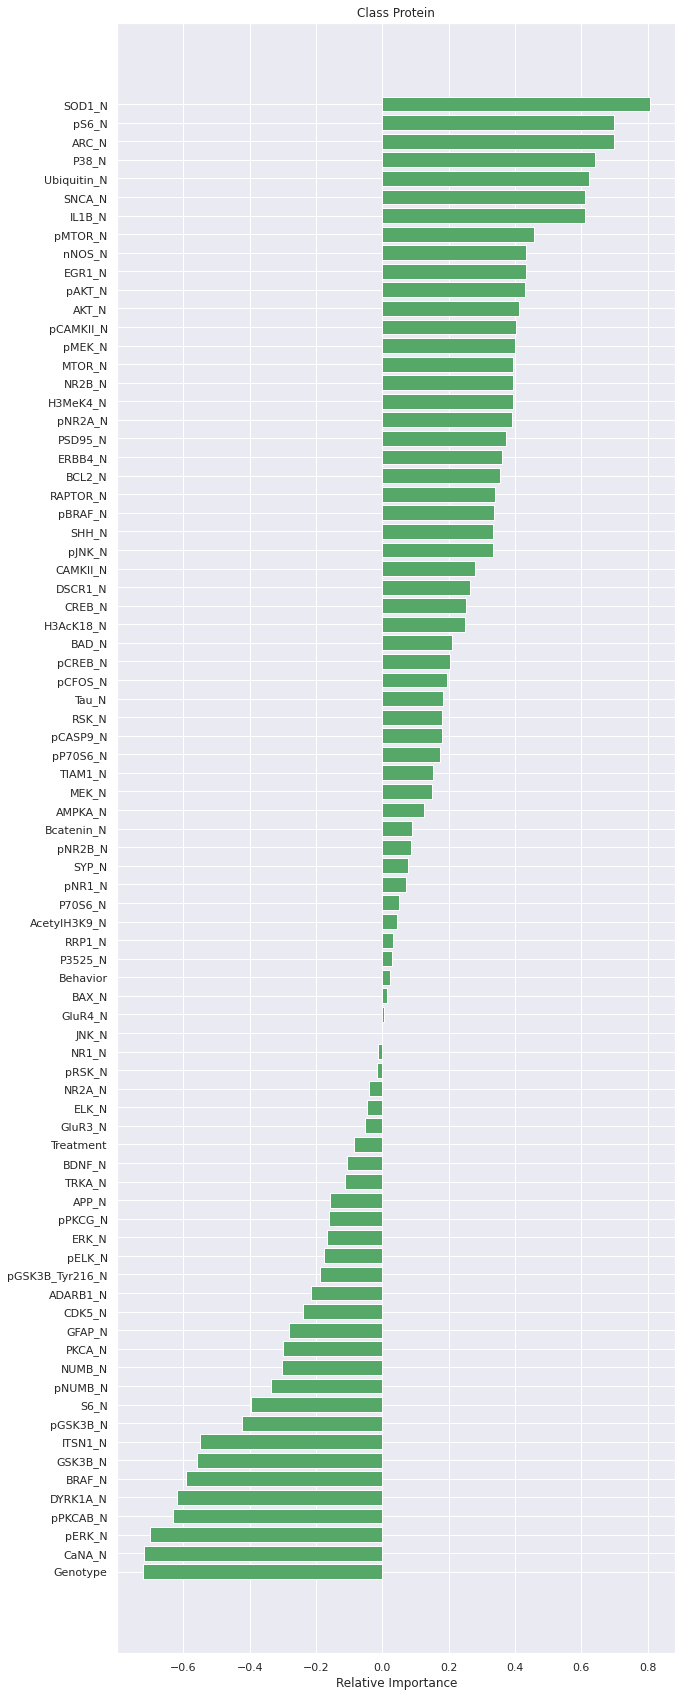

In [161]:
names = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N','Genotype','Treatment','Behavior']
plt.figure(figsize=(10,30))
plt.title('Class Protein')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We set the threshold to the absolute value of 0.1. We keep input features only if the correlation of the input feature with the target variable is greater than 0.1 and take one that most not relative

In [166]:
for i in range(0, len(indices)):
    if importances[i]>0.2:
        print("\'%s\'," %names[i], end= "")

'pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pJNK_N','pMEK_N','pNR2A_N','AKT_N','CAMKII_N','CREB_N','SOD1_N','MTOR_N','P38_N','pMTOR_N','DSCR1_N','NR2B_N','RAPTOR_N','ARC_N','ERBB4_N','nNOS_N','IL1B_N','PSD95_N','SNCA_N','Ubiquitin_N','SHH_N','BAD_N','BCL2_N','pS6_N','H3AcK18_N','EGR1_N','H3MeK4_N',

In [0]:
X = X[['pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pJNK_N','pMEK_N','pNR2A_N','AKT_N','CAMKII_N','CREB_N','SOD1_N','MTOR_N','P38_N','pMTOR_N','DSCR1_N','NR2B_N','RAPTOR_N','ARC_N','ERBB4_N','nNOS_N','IL1B_N','PSD95_N','SNCA_N','Ubiquitin_N','SHH_N','BAD_N','BCL2_N','pS6_N','H3AcK18_N','EGR1_N','H3MeK4_N']]

In [168]:
X

,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pJNK_N,pMEK_N,pNR2A_N,AKT_N,CAMKII_N,CREB_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,NR2B_N,RAPTOR_N,ARC_N,ERBB4_N,nNOS_N,IL1B_N,PSD95_N,SNCA_N,Ubiquitin_N,SHH_N,BAD_N,BCL2_N,pS6_N,H3AcK18_N,EGR1_N,H3MeK4_N
0,0.207174,0.176640,3.728084,0.239283,0.321260,0.255293,1.099300,0.873228,0.343220,0.167629,0.340857,0.487664,0.401050,0.781365,0.534033,0.618023,0.321960,0.132001,0.161120,0.210988,0.527242,2.436587,0.168172,1.139154,0.239752,0.139052,0.112926,0.132001,0.125152,0.146865,0.143517
1,0.223433,0.167725,3.648240,0.221030,0.342918,0.270815,1.078712,0.789013,0.344807,0.166695,0.337682,0.472618,0.402318,0.786524,0.533219,0.603176,0.296052,0.139008,0.161529,0.210798,0.519787,2.354728,0.174704,1.227851,0.249031,0.133787,0.121607,0.139008,0.112857,0.161132,0.145719
2,0.208790,0.173261,3.814545,0.222300,0.328976,0.263795,1.094043,0.793754,0.352048,0.172559,0.342398,0.493903,0.410913,0.812791,0.564699,0.640232,0.299675,0.134804,0.181034,0.202534,0.506309,2.437317,0.156001,1.226103,0.247956,0.142324,0.130261,0.134804,0.116433,0.160594,0.142879
3,0.205892,0.161192,3.778530,0.194153,0.311548,0.241562,0.924822,0.742183,0.337510,0.161982,0.312112,0.466305,0.394740,0.740603,0.522971,0.585055,0.286714,0.118982,0.163632,0.195311,0.526503,2.382140,0.145049,1.056498,0.233225,0.133637,0.107321,0.118982,0.102831,0.144238,0.141681
4,0.210526,0.165671,3.871971,0.194297,0.315001,0.254142,0.938465,0.715880,0.338668,0.160600,0.309478,0.472332,0.393666,0.739209,0.542207,0.587400,0.290319,0.128635,0.167972,0.196992,0.542568,2.386217,0.150945,1.132737,0.244469,0.133358,0.112851,0.128635,0.110614,0.155667,0.146408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.317810,0.213235,6.219567,0.232639,0.393382,0.365605,0.741830,0.775327,0.442810,0.224877,0.521242,0.593342,0.550041,0.950776,0.761234,0.702410,0.420547,0.132591,0.179531,0.199371,0.491774,2.310670,0.170215,1.553472,0.245705,0.184612,0.133317,0.132591,0.172393,0.200097,0.221994
548,0.316903,0.222111,6.307723,0.239074,0.388745,0.364997,0.763720,0.785472,0.449212,0.239473,0.533826,0.613450,0.560567,0.963680,0.786869,0.714827,0.435242,0.132869,0.165545,0.195459,0.456631,2.330010,0.168669,1.519222,0.261893,0.188972,0.153772,0.132869,0.177319,0.207593,0.235223
549,0.330158,0.225620,6.060165,0.254951,0.404111,0.379794,0.695162,0.770619,0.473302,0.233643,0.527701,0.532715,0.505139,0.865630,0.737278,0.690649,0.404111,0.129793,0.155877,0.192803,0.486801,2.265556,0.170805,1.470930,0.232715,0.189189,0.146135,0.129793,0.169076,0.182590,0.243715
550,0.343610,0.229239,6.023371,0.240676,0.397563,0.393585,0.723272,0.807310,0.489806,0.244654,0.539035,0.568125,0.517653,0.977126,0.767031,0.709846,0.416957,0.120850,0.172463,0.191503,0.493312,2.307160,0.176397,1.517388,0.231471,0.208497,0.155311,0.120850,0.180016,0.199685,0.269866


In [169]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

pAKT_N  is highly  correlated  with  pBRAF_N
pAKT_N  is highly  correlated  with  pJNK_N
pAKT_N  is highly  correlated  with  pMEK_N
pAKT_N  is highly  correlated  with  CAMKII_N
pAKT_N  is highly  correlated  with  CREB_N
pAKT_N  is not correlated  with  IL1B_N
pAKT_N  is not correlated  with  SHH_N
pAKT_N  is not correlated  with  H3AcK18_N
pAKT_N  is not correlated  with  EGR1_N
pBRAF_N  is highly  correlated  with  pAKT_N
pBRAF_N  is highly  correlated  with  pJNK_N
pBRAF_N  is highly  correlated  with  pMEK_N
pBRAF_N  is highly  correlated  with  CAMKII_N
pBRAF_N  is highly  correlated  with  CREB_N
pBRAF_N  is not correlated  with  nNOS_N
pBRAF_N  is not correlated  with  IL1B_N
pBRAF_N  is not correlated  with  SNCA_N
pBRAF_N  is not correlated  with  SHH_N
pBRAF_N  is not correlated  with  H3AcK18_N
pCAMKII_N  is not correlated  with  AKT_N
pCAMKII_N  is not correlated  with  SOD1_N
pCAMKII_N  is not correlated  with  IL1B_N
pCAMKII_N  is not correlated  with  SNCA_N
pCAMKII_N 

take one of them that highly corelated and all of not corelated

In [0]:
mi = mutual_info_regression(X, Y)

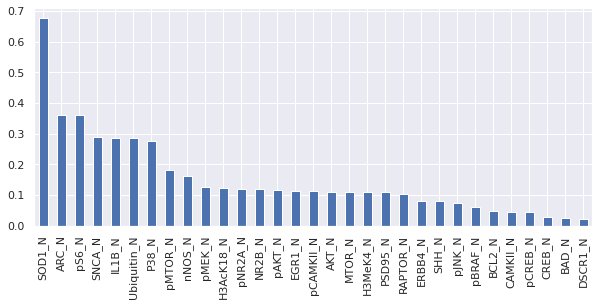

In [171]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

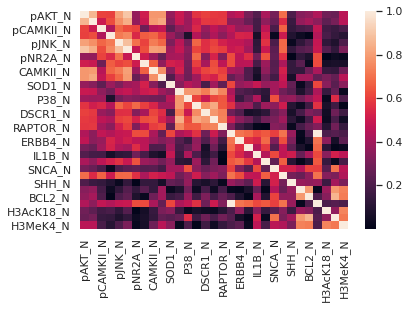

In [172]:
Xcorr = X.corr().abs()
sns.heatmap(Xcorr)

# Clustering K-means

In [173]:
x_array = np.array(X.iloc[:,0:23])
x_array

array([[0.2071741 , 0.17664042, 3.72808399, ..., 0.52724229, 2.43658685,
        0.16817167],
       [0.22343348, 0.16772532, 3.64824034, ..., 0.51978721, 2.35472805,
        0.17470419],
       [0.20879025, 0.17326081, 3.81454514, ..., 0.50630867, 2.43731705,
        0.15600081],
       ...,
       [0.33015793, 0.22562046, 6.06016545, ..., 0.48680075, 2.26555625,
        0.17080453],
       [0.34361014, 0.22923918, 6.02337146, ..., 0.49331235, 2.30715972,
        0.17639654],
       [0.35378274, 0.23278371, 6.08535403, ..., 0.474267  , 2.27963194,
        0.17763568]])

In [0]:
kmeans = KMeans(n_clusters = 8, random_state=42)

In [175]:
kmeans.fit(x_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [176]:
print(kmeans.cluster_centers_)

[[0.18537731 0.15188315 1.78485446 0.16868127 0.24113542 0.20673095
  0.49980203 0.56089004 0.29557103 0.15248966 0.30520727 0.40127222
  0.36301036 0.61513509 0.51895789 0.46946379 0.28317846 0.10473713
  0.14023856 0.15635681 0.48031087 1.91046956 0.15318702]
 [0.24823204 0.1883295  4.32058582 0.22624574 0.34032501 0.2918967
  0.88043108 0.76150617 0.37211494 0.18365878 0.78293918 0.47141894
  0.44529353 0.85125935 0.59705389 0.61544441 0.32598219 0.13148678
  0.16398629 0.20525781 0.57159028 2.31403769 0.16538283]
 [0.25917019 0.19342352 6.23003799 0.22788743 0.36195785 0.3126235
  0.91528678 0.71794333 0.38608944 0.19707554 0.55674418 0.47336105
  0.45359386 0.85319836 0.62405248 0.61587565 0.33783543 0.1289984
  0.16295464 0.19294244 0.51797499 2.43902434 0.16122551]
 [0.20055683 0.16080063 2.37099736 0.19327214 0.27510189 0.24019357
  0.58104326 0.63194562 0.32582859 0.1614848  0.36243834 0.3976822
  0.34170162 0.64109084 0.51231929 0.48752638 0.27627387 0.11115309
  0.15077116 0

In [177]:
X["cluster"] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
X

,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pJNK_N,pMEK_N,pNR2A_N,AKT_N,CAMKII_N,CREB_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,NR2B_N,RAPTOR_N,ARC_N,ERBB4_N,nNOS_N,IL1B_N,PSD95_N,SNCA_N,Ubiquitin_N,SHH_N,BAD_N,BCL2_N,pS6_N,H3AcK18_N,EGR1_N,H3MeK4_N,cluster
0,0.207174,0.176640,3.728084,0.239283,0.321260,0.255293,1.099300,0.873228,0.343220,0.167629,0.340857,0.487664,0.401050,0.781365,0.534033,0.618023,0.321960,0.132001,0.161120,0.210988,0.527242,2.436587,0.168172,1.139154,0.239752,0.139052,0.112926,0.132001,0.125152,0.146865,0.143517,4
1,0.223433,0.167725,3.648240,0.221030,0.342918,0.270815,1.078712,0.789013,0.344807,0.166695,0.337682,0.472618,0.402318,0.786524,0.533219,0.603176,0.296052,0.139008,0.161529,0.210798,0.519787,2.354728,0.174704,1.227851,0.249031,0.133787,0.121607,0.139008,0.112857,0.161132,0.145719,4
2,0.208790,0.173261,3.814545,0.222300,0.328976,0.263795,1.094043,0.793754,0.352048,0.172559,0.342398,0.493903,0.410913,0.812791,0.564699,0.640232,0.299675,0.134804,0.181034,0.202534,0.506309,2.437317,0.156001,1.226103,0.247956,0.142324,0.130261,0.134804,0.116433,0.160594,0.142879,4
3,0.205892,0.161192,3.778530,0.194153,0.311548,0.241562,0.924822,0.742183,0.337510,0.161982,0.312112,0.466305,0.394740,0.740603,0.522971,0.585055,0.286714,0.118982,0.163632,0.195311,0.526503,2.382140,0.145049,1.056498,0.233225,0.133637,0.107321,0.118982,0.102831,0.144238,0.141681,4
4,0.210526,0.165671,3.871971,0.194297,0.315001,0.254142,0.938465,0.715880,0.338668,0.160600,0.309478,0.472332,0.393666,0.739209,0.542207,0.587400,0.290319,0.128635,0.167972,0.196992,0.542568,2.386217,0.150945,1.132737,0.244469,0.133358,0.112851,0.128635,0.110614,0.155667,0.146408,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.317810,0.213235,6.219567,0.232639,0.393382,0.365605,0.741830,0.775327,0.442810,0.224877,0.521242,0.593342,0.550041,0.950776,0.761234,0.702410,0.420547,0.132591,0.179531,0.199371,0.491774,2.310670,0.170215,1.553472,0.245705,0.184612,0.133317,0.132591,0.172393,0.200097,0.221994,2
548,0.316903,0.222111,6.307723,0.239074,0.388745,0.364997,0.763720,0.785472,0.449212,0.239473,0.533826,0.613450,0.560567,0.963680,0.786869,0.714827,0.435242,0.132869,0.165545,0.195459,0.456631,2.330010,0.168669,1.519222,0.261893,0.188972,0.153772,0.132869,0.177319,0.207593,0.235223,2
549,0.330158,0.225620,6.060165,0.254951,0.404111,0.379794,0.695162,0.770619,0.473302,0.233643,0.527701,0.532715,0.505139,0.865630,0.737278,0.690649,0.404111,0.129793,0.155877,0.192803,0.486801,2.265556,0.170805,1.470930,0.232715,0.189189,0.146135,0.129793,0.169076,0.182590,0.243715,2
550,0.343610,0.229239,6.023371,0.240676,0.397563,0.393585,0.723272,0.807310,0.489806,0.244654,0.539035,0.568125,0.517653,0.977126,0.767031,0.709846,0.416957,0.120850,0.172463,0.191503,0.493312,2.307160,0.176397,1.517388,0.231471,0.208497,0.155311,0.120850,0.180016,0.199685,0.269866,2


# Classification

In [0]:
x = full_data.iloc[:,0:77]
y = full_data.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33,random_state=0)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [192]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [193]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.99


In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 1.00


In [196]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00
